In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_csv('/content/fraudTrain.csv')
rows_with_nan = df[df.isnull().any(axis=1)]
print(df)
print(df.dtypes)

      Index trans_date_trans_time        cc_num  \
0         0         1/1/2019 0:00  2.703190e+15   
1         1         1/1/2019 0:00  6.304230e+11   
2         2         1/1/2019 0:00  3.885950e+13   
3         3         1/1/2019 0:01  3.534090e+15   
4         4         1/1/2019 0:03  3.755340e+14   
...     ...                   ...           ...   
4146   4146        1/3/2019 14:07  3.597340e+15   
4147   4147        1/3/2019 14:08  3.760130e+14   
4148   4148        1/3/2019 14:11  3.447100e+14   
4149   4149        1/3/2019 14:11  1.800850e+14   
4150   4150        1/3/2019 14:12  3.573030e+15   

                                merchant        category     amt      first  \
0             fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1        fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                   fraud_Lind-Buckridge   entertainment  220.11     Edward   
3     fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Je

In [ ]:
df.head()

,Index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


print("\nMissing Values:")
print(df.isnull().sum())

df.dropna(inplace=True)
print("\nData after dropping missing values:")
print(df.shape)

window_size = 3
numeric_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
for col in numeric_cols:
    df[col + '_smoothed'] = df[col].rolling(window=window_size, min_periods=1).mean()

print("\nData after smoothing:")
print(df[[col + '_smoothed' for col in numeric_cols]].head(5))

min_max_scaler = MinMaxScaler()
z_score_scaler = StandardScaler()

df['amt_normalized'] = min_max_scaler.fit_transform(df[['amt']])
df['lat_normalized'] = min_max_scaler.fit_transform(df[['lat']])
df['long_normalized'] = min_max_scaler.fit_transform(df[['long']])
df['city_pop_normalized'] = min_max_scaler.fit_transform(df[['city_pop']])
df['merch_lat_normalized'] = min_max_scaler.fit_transform(df[['merch_lat']])
df['merch_long_normalized'] = min_max_scaler.fit_transform(df[['merch_long']])

df['amt_zscore'] = z_score_scaler.fit_transform(df[['amt']])
df['lat_zscore'] = z_score_scaler.fit_transform(df[['lat']])
df['long_zscore'] = z_score_scaler.fit_transform(df[['long']])
df['city_pop_zscore'] = z_score_scaler.fit_transform(df[['city_pop']])
df['merch_lat_zscore'] = z_score_scaler.fit_transform(df[['merch_lat']])
df['merch_long_zscore'] = z_score_scaler.fit_transform(df[['merch_long']])

print("\nData after normalization:")
print(df[['amt_normalized', 'amt_zscore']].head())




df.to_csv('preprocessed_data.csv', index=False)
print("\nPreprocessed data saved to 'preprocessed_data.csv'.")



Missing Values:
Index                    0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

Data after dropping missing values:
(4150, 23)

Data after smoothing:
   amt_smoothed  lat_smoothed  long_smoothed  city_pop_smoothed  \
0      4.970000     36.078800     -81.178100        3495.000000   
1     56.100000     42.483300     -99.694300        1822.000000   
2    110.770000     42.382467    -103.883533        2599.333333   
3    124.1


Pearson Correlation Matrix:
                 amt       lat      long  city_pop  merch_lat  merch_long  \
amt         1.000000  0.040364 -0.049153  0.012804   0.040782   -0.048983   
lat         0.040364  1.000000 -0.000144 -0.149215   0.993598   -0.000143   
long       -0.049153 -0.000144  1.000000 -0.051203   0.000418    0.999176   
city_pop    0.012804 -0.149215 -0.051203  1.000000  -0.148122   -0.050896   
merch_lat   0.040782  0.993598  0.000418 -0.148122   1.000000    0.000299   
merch_long -0.048983 -0.000143  0.999176 -0.050896   0.000299    1.000000   
is_fraud    0.120014 -0.062905 -0.003681  0.155326  -0.063001   -0.003182   

            is_fraud  
amt         0.120014  
lat        -0.062905  
long       -0.003681  
city_pop    0.155326  
merch_lat  -0.063001  
merch_long -0.003182  
is_fraud    1.000000  


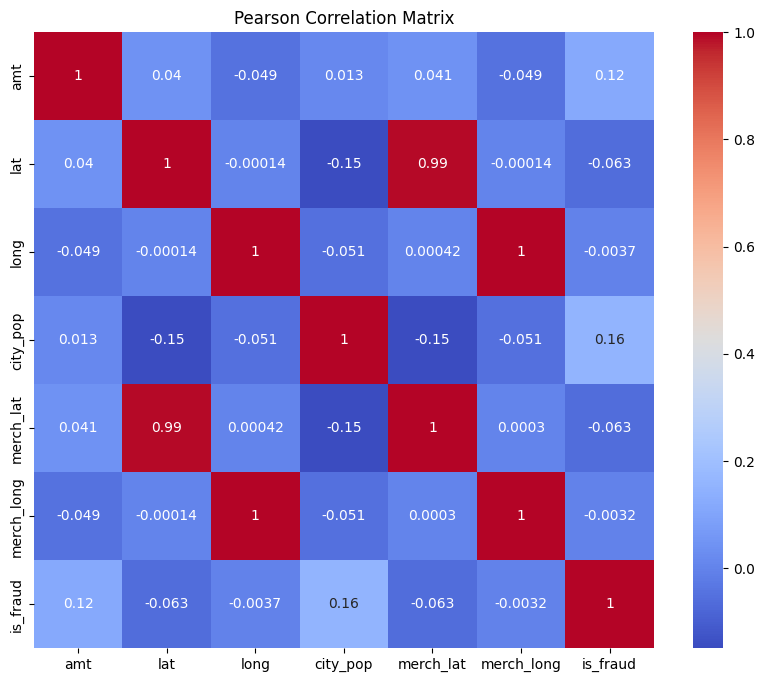

In [ ]:
print("\nPearson Correlation Matrix:")
corr_matrix = df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']].corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()


In [ ]:
bins = [0, 50000, 200000, df['city_pop'].max()]
labels = ['Low', 'Medium', 'High']
df['city_pop_category'] = pd.cut(df['city_pop'], bins=bins, labels=labels, include_lowest=True)

print("\nData after discretizing 'city_pop':")
print(df[['city_pop', 'city_pop_category']].head())



Data after discretizing 'city_pop':
   city_pop city_pop_category
0    3495.0               Low
1     149.0               Low
2    4154.0               Low
3    1939.0               Low
4      99.0               Low


In [ ]:
categorical_cols = ['city', 'state', 'category', 'gender', 'job']
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['is_fraud'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"\nChi-Square Test for {col}:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p}")
    if p < 0.05:
        print(f"'{col}' is significantly associated with 'is_fraud'.")
    else:
        print(f"'{col}' is NOT significantly associated with 'is_fraud'.")



Chi-Square Test for city:
Chi2 Statistic: 2034.3305728088337
Degrees of Freedom: 799
P-value: 1.0186108050943659e-108
'city' is significantly associated with 'is_fraud'.

Chi-Square Test for state:
Chi2 Statistic: 121.7419367936335
Degrees of Freedom: 49
P-value: 4.0044952284688234e-08
'state' is significantly associated with 'is_fraud'.

Chi-Square Test for category:
Chi2 Statistic: 23.572427152862588
Degrees of Freedom: 13
P-value: 0.03529857138919499
'category' is significantly associated with 'is_fraud'.

Chi-Square Test for gender:
Chi2 Statistic: 0.0
Degrees of Freedom: 1
P-value: 1.0
'gender' is NOT significantly associated with 'is_fraud'.

Chi-Square Test for job:
Chi2 Statistic: 2319.589371980677
Degrees of Freedom: 462
P-value: 2.0956572987593055e-244
'job' is significantly associated with 'is_fraud'.


Counts for each 'amt_binned' category (Low, Medium, High):
amt_binned
Low       3442
Medium     672
High        36
Name: count, dtype: int64

Model Evaluation:
Accuracy: 0.9960
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


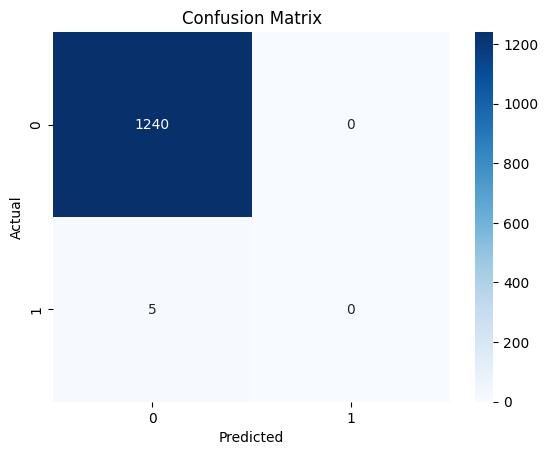


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1240
         1.0       0.00      0.00      0.00         5

    accuracy                           1.00      1245
   macro avg       0.50      0.50      0.50      1245
weighted avg       0.99      1.00      0.99      1245



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


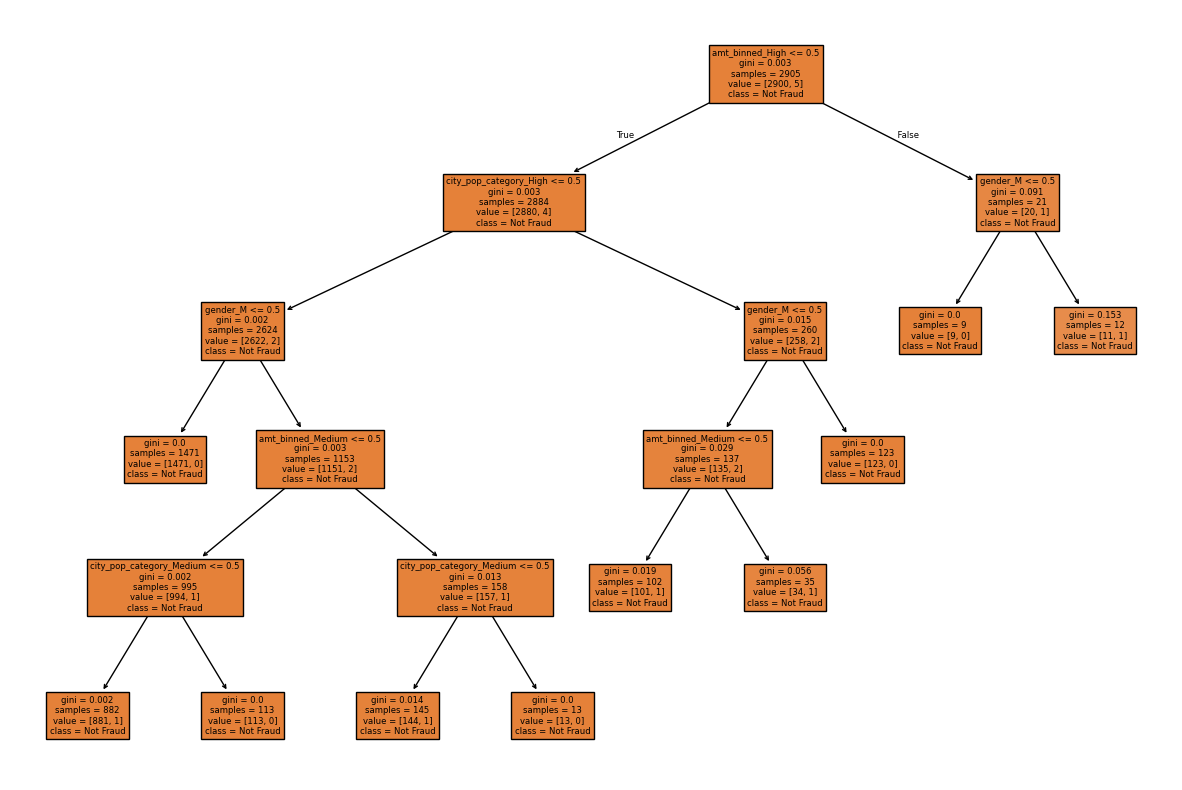

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree



# Discretizing 'city_pop'
bins_city_pop = [0, 50000, 200000, df['city_pop'].max()]
labels_city_pop = ['Low', 'Medium', 'High']
df['city_pop_category'] = pd.cut(df['city_pop'], bins=bins_city_pop, labels=labels_city_pop, include_lowest=True)

# Binning 'amt'
bins_amt = [0, 100, 500, df['amt'].max()]
labels_amt = ['Low', 'Medium', 'High']
df['amt_binned'] = pd.cut(df['amt'], bins=bins_amt, labels=labels_amt, include_lowest=True)
amt_binned_counts = df['amt_binned'].value_counts()


print("Counts for each 'amt_binned' category (Low, Medium, High):")
print(amt_binned_counts)
df = df[['gender', 'city_pop_category', 'amt_binned', 'is_fraud']]

# One-Hot Encode
df = pd.get_dummies(df, columns=['gender', 'city_pop_category', 'amt_binned'], drop_first=True)


X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()
